In [1]:
from qiskit import *

In [2]:
qr = QuantumRegister(1, r'psi')
qc = QuantumCircuit(qr)
print(qc.draw(output='latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=1.0em @!R { \\
	 	\nghost{{psi} :  } & \lstick{{psi} :  } & \qw & \qw\\
\\ }}
\end{document}


In [3]:
qr = QuantumRegister(1, r'psi')
qc = QuantumCircuit(qr)
qc.x(qr[0])
print(qc.draw(output='latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{psi} :  } & \lstick{{psi} :  } & \gate{\mathrm{X}} & \qw & \qw\\
\\ }}
\end{document}


In [4]:
qr = QuantumRegister(1)
cr = ClassicalRegister(1)
qc = QuantumCircuit(qr, cr)
qc.h(qr[0])
qc.measure(qr, cr)
print(qc.draw(output='latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q0} :  } & \lstick{{q0} :  } & \gate{\mathrm{H}} & \meter & \qw & \qw\\
	 	\nghost{\mathrm{{c0} :  }} & \lstick{\mathrm{{c0} :  }} & \lstick{/_{_{1}}} \cw & \dstick{_{_{\hspace{0.0em}0}}} \cw \ar @{<=} [-1,0] & \cw & \cw\\
\\ }}
\end{document}


In [5]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

provider = IBMQ.load_account()
device = least_busy(
    provider.backends(
        filters=lambda x: x.configuration().n_qubits >= 1
                          and not x.configuration().simulator                # Not a simulator
                          and x.status().operational == True                 # Operational backend
    )
)

C:\Users\romai\AppData\Local\Temp\ipykernel_11624\2549972265.py:4: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


In [6]:
from qiskit.tools import job_monitor

# Select a backend.
backend = provider.get_backend("ibmq_qasm_simulator")
print(backend)

# Transpile the circuit
transpiled = transpile(qc, backend=backend)

# Submit a job.
job = backend.run(transpiled)
job_monitor(job)
# Get results.
print(job.result().get_counts())

ibmq_qasm_simulator
Job Status: job has successfully run
{'1': 1949, '0': 2051}


In [7]:
# using tikzplotlib to export plot to latex
import tikzplotlib
import matplotlib.pyplot as plt

def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

def save_fig(name, width='10cm', height='10cm'):
    fig = plt.gcf()
    tikzplotlib_fix_ncols(fig)

    tikzplotlib.clean_figure()
    tikzplotlib.save(name + '.tex', axis_width=width, axis_height=height)

C:\Users\romai\AppData\Roaming\Python\Python310\site-packages\tikzplotlib\_cleanfigure.py:200: UserWarning: Cleaning Bar Container (bar plot) is not supported yet.
  warnings.warn("Cleaning Bar Container (bar plot) is not supported yet.")


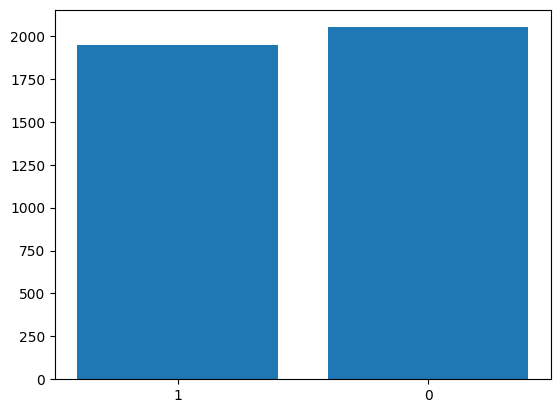

In [8]:
counts = job.result().get_counts()
plt.bar(counts.keys(), counts.values())
save_fig('real-mes-supp')

In [11]:
from qiskit.providers.fake_provider import FakeVigo
backend = FakeVigo()
print(backend)

# Transpile the circuit
transpiled = transpile(qc, backend=backend)

# Submit a job.
job = backend.run(transpiled)
job_monitor(job)
# Get results.
print(job.result().get_counts())

fake_vigo
Job Status: job has successfully run
{'1': 514, '0': 510}
